# Algerian Forest Fire Dataset

The Algerian Forest Fires Dataset contains data related to forest fires in Algeria. It includes meteorological, environmental, and fire occurrence attributes to study fire prediction and related analysis. The dataset is split into two regions of Algeria (Bejaia and Sidi Bel-abbes) and includes multiple features measured over time. Here are the main features and specifications of this dataset:

# Key Features
Day and Month:
The day and month the data was recorded.

Temperature:
Temperature recorded in degrees Celsius.

RH (Relative Humidity):
The relative humidity percentage.
Ws (Wind Speed): 
Wind speed measured in km/h.
Rain:
Rainfall amount in mm.
FFMC (Fine Fuel Moisture Code):
Indicates moisture content in surface litter and small fuel materials, impacting fire spread.

DMC (Duff Moisture Code):
Indicates moisture content in loosely compacted organic layers, affecting fire ignition.

DC (Drought Code)
Represents moisture content in compact organic layers, reflecting long-term drought conditions.

ISI (Initial Spread Index):
A measure of fire spread rate.

BUI (Buildup Index):
 Represents the total amount of fuel available for combustion.

FWI (Fire Weather Index):
A measure of fire intensity or potential fire spread.

Classes:
The binary classification target indicating whether a fire occurred or not, with values "Fire" or "No Fire".
Dataset Specifications

Region-specific data:
Data is divided into Bejaia and Sidi Bel-abbes regions of Algeria.

Time Frame:
The data was collected across various months and days to capture seasonality and different weather conditions.

Binary Classification:
The target is binary ("Fire" or "No Fire") to support classification models.

Number of Instances:
There are 244 instances in total, with data split between the two regions.

In [845]:
import numpy as np             
import pandas as pd        
import matplotlib.pyplot as plt  
import seaborn as sns     
%matplotlib inline            


In [846]:
data = pd.read_csv('Algerian_forest_fires_dataset.csv')

In [847]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [848]:
data[data.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [849]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [850]:
data.loc[:123 ,"Region" ] = 0
data.loc[123: ,"Region"] = 1

In [851]:
data.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [852]:
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [853]:
data[data.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [854]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [855]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [856]:
data.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [857]:
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [858]:
data[data.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [859]:
# Drop rows containing NaN values and reset the index
data = data.dropna(how="any").reset_index(drop=True)

data= data.drop(167).reset_index(drop=True)

In [860]:
data[data.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [861]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [862]:
print(data.dtypes)  


day             object
month           object
year            object
Temperature     object
 RH             object
 Ws             object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object


In [863]:
# Clean non-numeric values by converting them to NaN, then dropping/filling as needed
data[['month', 'day', 'year', 'Temperature', ' RH', ' Ws']] = data[['month', 'day', 'year', 'Temperature', ' RH', ' Ws']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in these columns (if that fits your requirements)
data.dropna(subset=['month', 'day', 'year', 'Temperature', ' RH', ' Ws'], inplace=True)

# Convert to integer now
data[['month', 'day', 'year', 'Temperature', ' RH', ' Ws']] = data[['month', 'day', 'year', 'Temperature', ' RH', ' Ws']].astype(int)


In [864]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4    RH          242 non-null    int64  
 5    Ws          242 non-null    int64  
 6   Rain         242 non-null    object 
 7   FFMC         242 non-null    object 
 8   DMC          242 non-null    object 
 9   DC           242 non-null    object 
 10  ISI          242 non-null    object 
 11  BUI          242 non-null    object 
 12  FWI          242 non-null    object 
 13  Classes      242 non-null    object 
 14  Region       242 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 30.2+ KB


In [865]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

Change int the other columns to float data datatypes

In [866]:
import pandas as pd

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Identify columns with object dtype, excluding 'Classes'
objects = [feature for feature in data.columns if data[feature].dtype == 'object' and feature != 'Classes']

# Clean and convert the identified columns to float
for column in objects:
    # Strip whitespace and replace non-numeric values with NaN
    data[column] = data[column].str.strip()  # Remove leading/trailing whitespace
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Convert to float, coercing errors

# Ensure 'Classes' remains as an object (even if it has NaNs)
if 'Classes' in data.columns:
    data['Classes'] = data['Classes'].astype(object)

# Check the data types again to confirm the conversion
print(data.dtypes)


day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region         float64
dtype: object


In [867]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 30.2+ KB


In [868]:
data['Region'] = data['Region'].astype(int)

In [869]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.2+ KB


In [870]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.760331,7.504132,2012.0,32.157025,61.954545,15.487603,0.766116,77.814876,14.661157,49.498347,4.742562,16.680165,7.034298,0.495868
std,8.860865,1.116634,0.0,3.634798,14.797176,2.815534,2.006754,14.372958,12.414988,47.752761,4.162843,14.256990,7.455969,0.501019
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,71.625000,5.800000,11.425000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.200000,11.250000,33.250000,3.400000,12.250000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.000000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [871]:
#lets dave the cleaned dataset into another csv file 
data.to_csv('Algerian_forest_fires_cleaned_dataset.csv' , index=False)

# Exploratory Data Analysis

In [872]:
df_copy = data

In [873]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [874]:
# Drop day , month , year
df_copy = df_copy.drop(['day' , 'month' , 'year'] , axis=1)

In [875]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [876]:
df_copy['Classes'].value_counts()

Classes
fire             130
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [877]:
df_copy['Classes'] =np.where(df_copy['Classes'].str.contains('not fire') , 0 , 1)

In [878]:
df_copy['Classes'].value_counts()

Classes
1    136
0    106
Name: count, dtype: int64

In [879]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [880]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


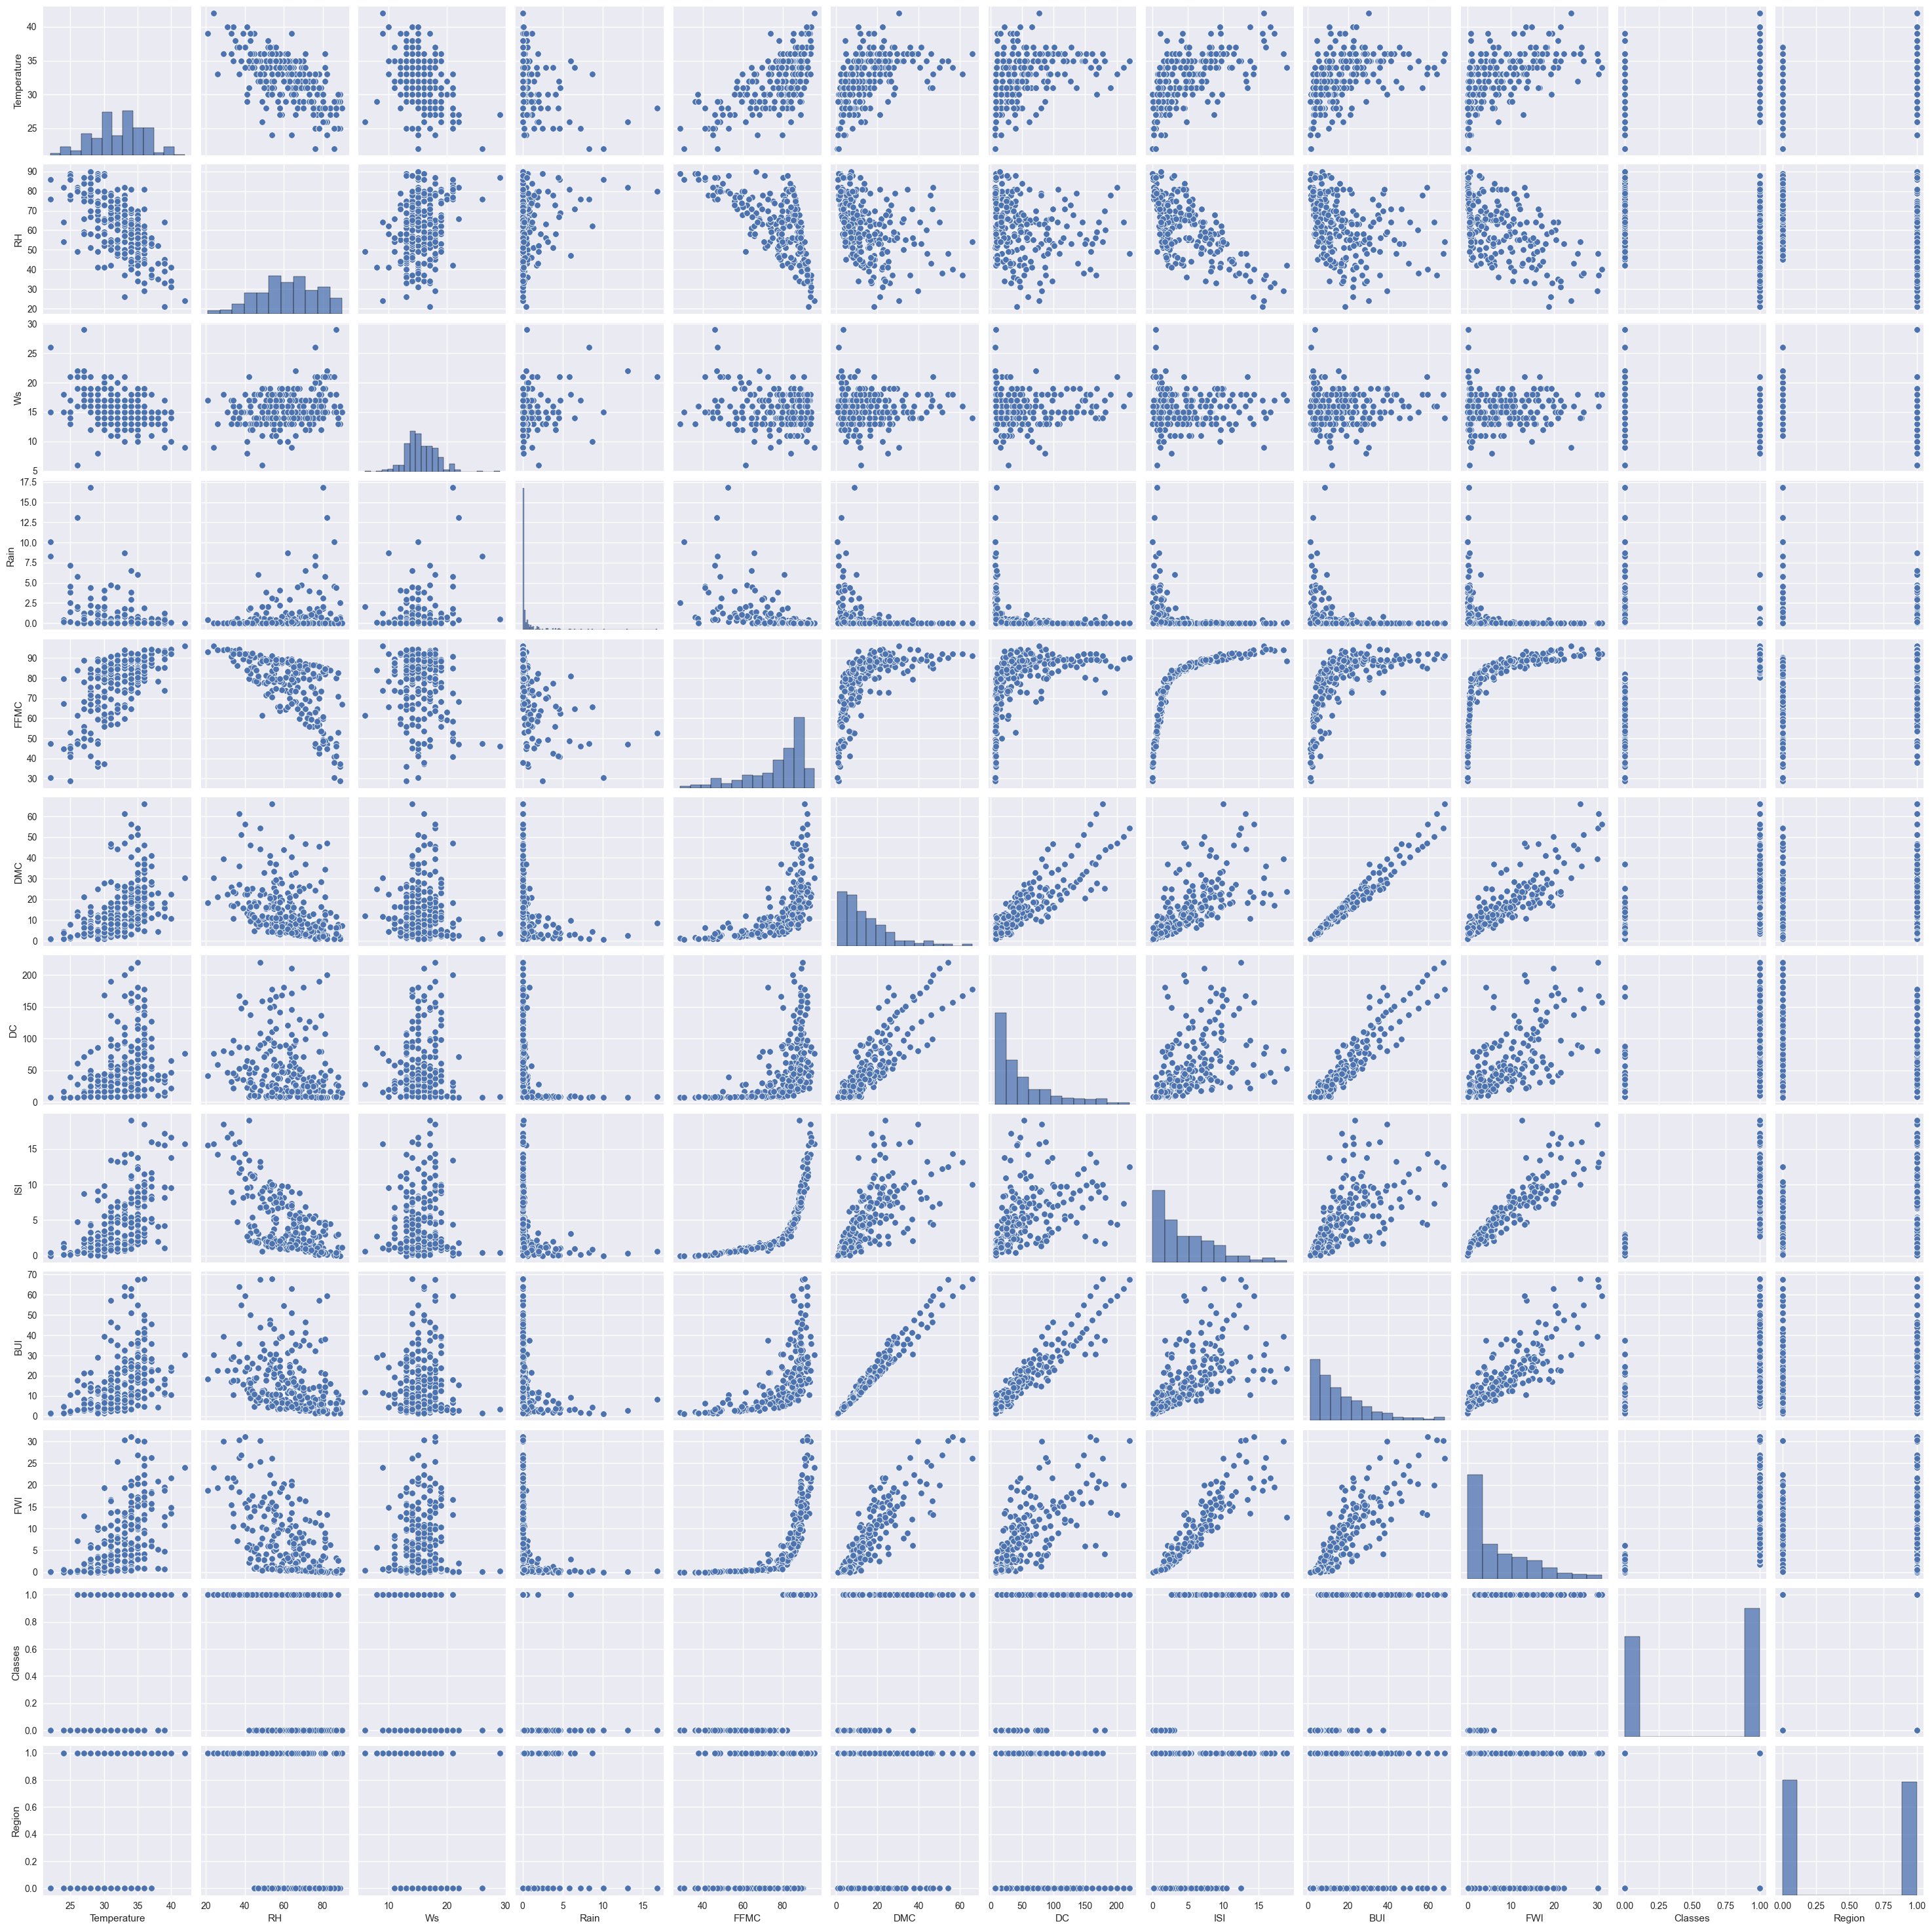

In [881]:
import seaborn as sns   
sns.pairplot(df_copy)

In [882]:
# precentage for pie chart 
percentage = df_copy['Classes'].value_counts(normalize=True)*100

Pie Chart of Classes 


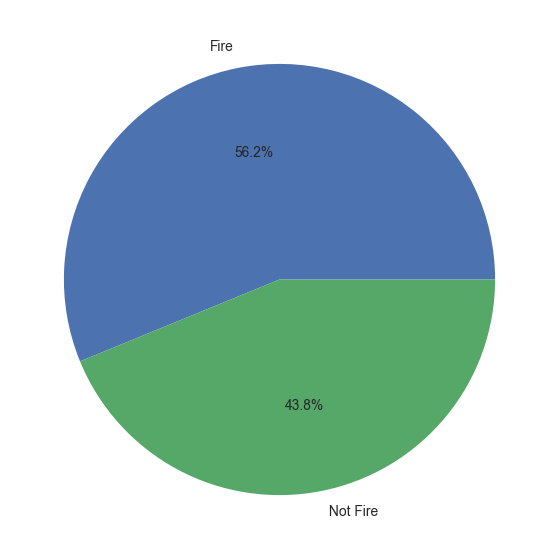

In [884]:
# plottin gpit chart 
classlabels = ["Fire" , " Not Fire"]
plt.figure(figsize=(12 , 7))
plt.pie(percentage , labels = classlabels , autopct='%1.1f%%')
print('Pie Chart of Classes ')
plt.show()


In [886]:
# Correlation 
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.652383,-0.284032,-0.327161,0.677624,0.486437,0.376002,0.603984,0.460148,0.566837,0.518109,0.271499
RH,-0.652383,1.000000,0.242055,0.225594,-0.650586,-0.412590,-0.225925,-0.689471,-0.356378,-0.583591,-0.439837,-0.411120
Ws,-0.284032,0.242055,1.000000,0.172507,-0.167754,-0.001569,0.079963,0.008559,0.031067,0.032308,-0.072073,-0.183880
Rain,-0.327161,0.225594,0.172507,1.000000,-0.543579,-0.288345,-0.298727,-0.347605,-0.299682,-0.324464,-0.378429,-0.038521
FFMC,0.677624,-0.650586,-0.167754,-0.543579,1.000000,0.603326,0.508407,0.740357,0.591974,0.691374,0.769376,0.220871
DMC,0.486437,-0.412590,-0.001569,-0.288345,0.603326,1.000000,0.876943,0.680675,0.982329,0.876074,0.585383,0.190961
DC,0.376002,-0.225925,0.079963,-0.298727,0.508407,0.876943,1.000000,0.508753,0.942530,0.739753,0.513317,-0.077490
ISI,0.603984,-0.689471,0.008559,-0.347605,0.740357,0.680675,0.508753,1.000000,0.644142,0.922899,0.736413,0.263790
BUI,0.460148,-0.356378,0.031067,-0.299682,0.591974,0.982329,0.942530,0.644142,1.000000,0.858005,0.586974,0.088866
FWI,0.566837,-0.583591,0.032308,-0.324464,0.691374,0.876074,0.739753,0.922899,0.858005,1.000000,0.720241,0.197367


<Axes: >

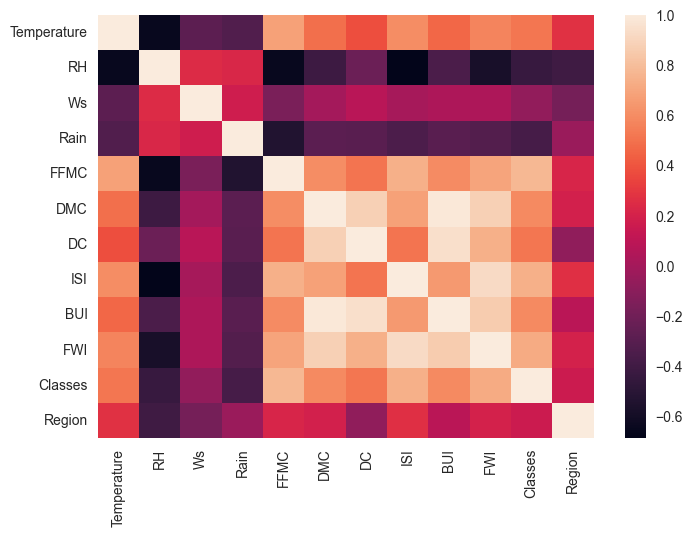

In [887]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

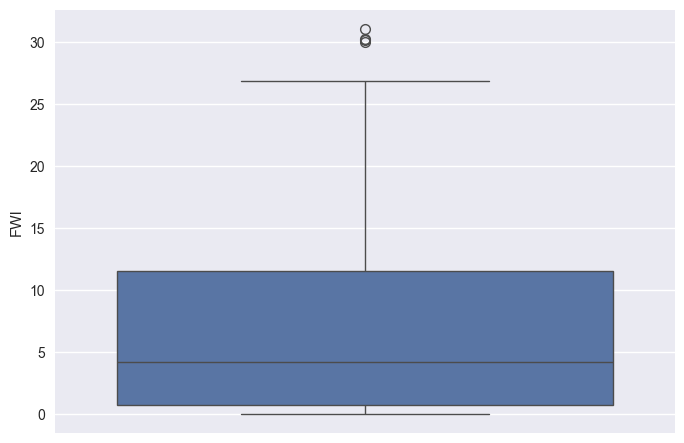

In [ ]:
## Box plot - to check the outliers 
sns.boxplot(data['FWI'])

Feature Selection 